# Laplace Smoothing and the Sunrise Problem
***

This notebook is associated to the blog on medium [Laplace Smoothing and the Sunrise Problem](https://medium.com/p/1ac6a22449b9/edit).

You may need to download ImageMagick to save the gif that you create. [ImageMagick](https://imagemagick.org/index.php)

You may also need to uncomment the following code in order to find the file path for matplotlib in order to change the how matplotlib writes to files. 
See the following stack discussion: [ImageMagick writing](https://stackoverflow.com/questions/25140952/matplotlib-save-animation-in-gif-error)

In [ ]:
# import matplotlib
# matplotlib.matplotlib_fname()

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys

from matplotlib.animation import FuncAnimation

In [2]:
# Fix d, the complete list of observable symptoms
d = ['runny_nose', 'muscle_soreness', 'cough']

# Fix N_cold, the number times you have had a cold
N_cold = 16

# Fix N_flu, the number of times you have had the flu
N_flu = 9

# Fix the number of observations of each symptom given you had a cold
x_cold = {'runny_nose':12, 'muscle_soreness':0, 'cough':8}

# Fix the number of observations of each symptom given you had the flu
x_flu = {'runny_nose':9, 'muscle_soreness':6, 'cough':0}

# Fix a list of alpha pseudocounts to use, and a base alpha
alpha_list = [0, 2, 4, 6, 8, 10, 25, 50, 100, 250, 500, 1000]
alpha = 1

# Expected value given a uniform distribution of each symptom
uni_x = [1/len(d) for i in range(len(d))]

# Laplace smoothing of past probability values given a cold
lap_x_cold = [(x_cold[obs] + alpha)/(N_cold + alpha*len(d)) for obs in d]

# Actual past probability value given a cold
exp_x_cold = [x_cold[obs]/N_cold for obs in d]

# Laplace smoothing of past probability values given a flu
lap_x_flu = [(x_flu[obs] + alpha)/(N_flu + alpha*len(d)) for obs in d]

# Actual past probability value given a flu
exp_x_flu = [x_flu[obs]/N_flu for obs in d]

In [8]:
def update_cold(i):
    alpha_list = [0, 2, 4, 6, 8, 10, 25, 50, 100, 250, 500, 1000]
    alpha = alpha_list[i]/10
    label = 'alpha = {0}'.format(alpha)
    line.set_data(range(len(d)), [(x_cold[obs] + alpha)/(N_cold + alpha*len(d)) for obs in d])
    ax.set_xlabel(label)
    return line, ax

In [4]:
def update_flu(i):
    alpha_list = [0, 2, 4, 6, 8, 10, 25, 50, 100, 250, 500, 1000]
    alpha = alpha_list[i]/10
    label = 'alpha = {0}'.format(alpha)
    line.set_data(range(len(d)), [(x_flu[obs] + alpha)/(N_flu + alpha*len(d)) for obs in d], label='Laplace Smoothing Probability')
    ax.set_xlabel(label)
    return line, ax

#### Beware of Overlapping Gifs

If both gifs are running at the same time, one can interfere with the other

<IPython.core.display.Javascript object>


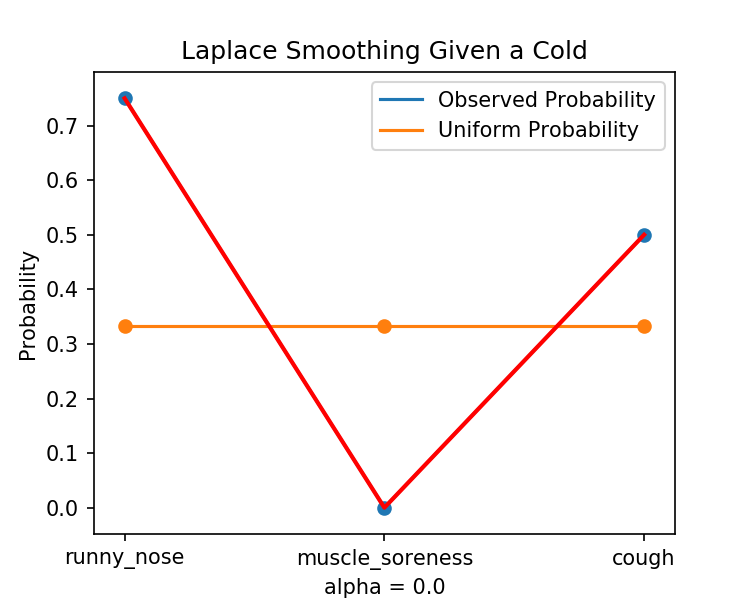

In [18]:
fig, ax = plt.subplots(figsize=(5,4))

alpha_list = [0, 2, 4, 6, 8, 10, 25, 50, 100, 250, 500, 1000]

ax.set_title('Laplace Smoothing Given a Cold')
ax.scatter(range(len(d)), exp_x_cold)
ax.plot(range(len(d)), exp_x_cold, label='Observed Probability')
ax.scatter(range(len(d)), uni_x)
ax.plot(range(len(d)), uni_x, label='Uniform Probability')
line, = ax.plot(range(len(d)), lap_x_cold, 'r-', linewidth=2)
ax.set_ylabel('Probability')
ax.set_xticks(range(len(d)))
ax.set_xticklabels(d)
ax.legend()

anim = FuncAnimation(fig, update_cold, frames=len(alpha_list), interval=500)

# Comment the following line if you do not want to save the gif
anim.save('cold_laplace_smoothing.gif', dpi=80, writer='imagemagick')
plt.show()

<IPython.core.display.Javascript object>


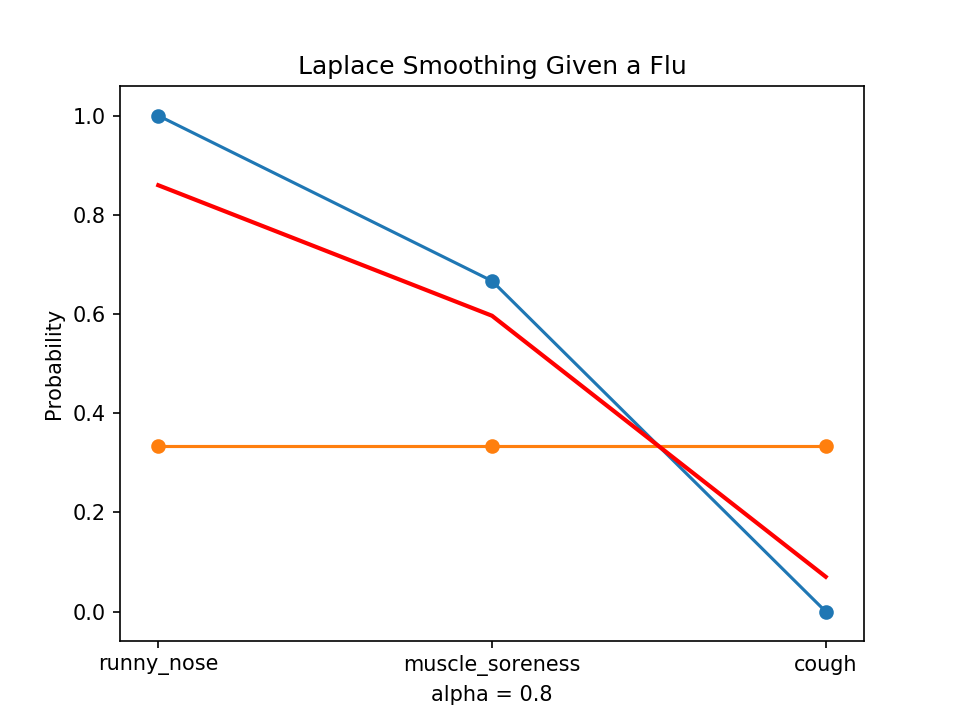

In [9]:
fig, ax = plt.subplots(figsize=(5,4))

alpha_list = [0, 2, 4, 6, 8, 10, 25, 50, 100, 250, 500, 1000]
    
ax.set_title('Laplace Smoothing Given a Flu')
ax.scatter(range(len(d)), exp_x_flu)
ax.plot(range(len(d)), exp_x_flu)
ax.scatter(range(len(d)), uni_x)
ax.plot(range(len(d)), uni_x)
line, = ax.plot(range(len(d)), lap_x_flu, 'r-', linewidth=2)
ax.set_ylabel('Probability')
ax.set_xticks(range(len(d)))
ax.set_xticklabels(d)
ax.legend()

anim = FuncAnimation(fig, update_flu, frames=len(alpha_list), interval=500)

# Comment the following line if you do not want to save the gif
anim.save('flu_laplace_smoothing.gif', dpi=80, writer='imagemagick')
plt.show()

In [10]:
# import matplotlib
# matplotlib.matplotlib_fname()

The following 2 cells will display each image in the gif (along with a legend) one by one. 
This allows you to download each image and create a gif in using your favorite tools not associated to Python. 

#### Beware of Uncommenting

Having two gifs and several images takes up lots of data!

In [6]:
# for a in alpha_list:
#     alpha = a/10
#     lap_x_cold = [(x_cold[obs] + alpha)/(N_cold + alpha*len(d)) for obs in d]
    
#     plt.figure(figsize=(10,3))
#     plt.plot(range(len(d)), exp_x_cold, label='Observed Probability')
#     plt.plot(range(len(d)), lap_x_cold, label='Laplace Smoothing Probability')
#     plt.plot(range(len(d)), uni_x, label='Uniform Probability')
#     plt.title('Laplace Smoothing Given Cold, alpha = '+str(alpha))
#     plt.ylabel('Probability')
#     plt.xticks(range(len(d)), d)
#     plt.legend()
#     plt.show()

In [7]:
# for a in alpha_list:
#     alpha = a/10
#     lap_x_flu = [(x_flu[obs] + alpha)/(N_flu + alpha*len(d)) for obs in d]
    
#     plt.figure(figsize=(10,3))
#     plt.plot(range(len(d)), exp_x_flu, label='Observed Probability')
#     plt.plot(range(len(d)), lap_x_flu, label='Laplace Smoothing Probability')
#     plt.plot(range(len(d)), uni_x, label='Uniform Probability')
#     plt.title('Laplace Smoothing Given Flu, alpha = '+str(alpha))
#     plt.ylabel('Probability')
#     plt.xticks(range(len(d)), d)
#     plt.legend()
#     plt.show()